In [165]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [166]:
import pandas as pd

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


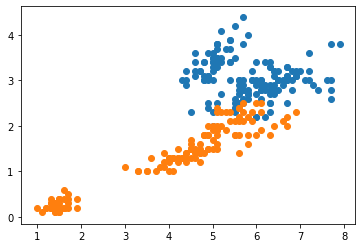

In [167]:
import matplotlib.pyplot as plt
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [168]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [169]:
df = df.drop(["sepal length (cm)","sepal width (cm)"],axis =1)

In [170]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


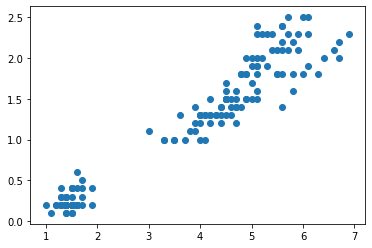

In [171]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [172]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [173]:
yp = km.fit_predict(df)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [174]:
df["cluster"] = yp

In [175]:
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [177]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [178]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

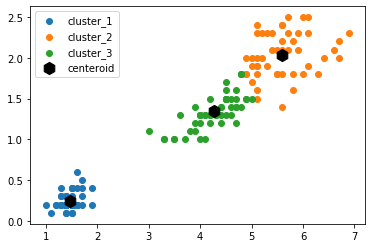

In [181]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],label = "cluster_1")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],label = "cluster_2")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],label = "cluster_3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 150,color = "black",marker = "h",label = "centeroid")
plt.legend()

In [154]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)

In [155]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.07065234189628,
 9.402481729055259,
 7.667019523446297,
 6.456494541406307]

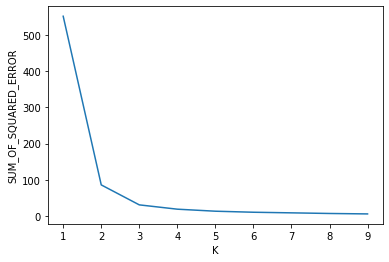

In [158]:
plt.xlabel("K")
plt.ylabel("SUM_OF_SQUARED_ERROR")
plt.plot(k_rng,sse)